In [48]:
import astroalign as aa
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.ndimage import rotate
from photutils.utils import make_random_cmap

In [23]:
image1 = 'data/PAL5/PAL5__e1/PAL5__e1_3p6um.fits'
image2 = 'data/PAL5/PAL5__e2/PAL5__e2_3p6um.fits'
data1 = fits.getdata(image1, ext=0)
data2 = fits.getdata(image2, ext=0)
#print(data1)

df1 = pd.DataFrame(np.array(data1).byteswap().newbyteorder())
df2 = pd.DataFrame(np.array(data2).byteswap().newbyteorder())
#print(df1)

df1.to_numpy()
df2.to_numpy()

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

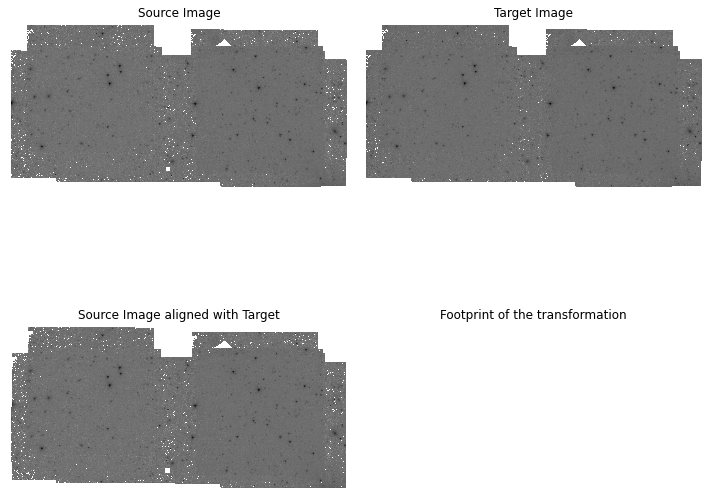

In [67]:
img_aligned, footprint = aa.register(np.array(data2).byteswap().newbyteorder(), np.array(data1).byteswap().newbyteorder())

norm = LogNorm()
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(data2, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")

axes[0, 1].imshow(data1, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")

axes[1, 0].imshow(img_aligned, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[1, 0].axis('off')
axes[1, 0].set_title("Source Image aligned with Target")

axes[1, 1].imshow(footprint, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[1, 1].axis('off')
axes[1, 1].set_title("Footprint of the transformation")

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()

In [59]:
plt.imshow(data1, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.savefig('images/aa_01.png', dpi=500)
plt.close()

plt.imshow(data2, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.savefig('images/aa_03.png', dpi=500)
plt.close()

plt.imshow(img_aligned, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
plt.savefig('images/aa_02.png', dpi=500)
plt.close()

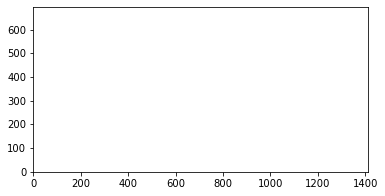

In [38]:
data1_rot = rotate(data1, angle=15., reshape=False)
plt.imshow(data1_rot, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')

In [68]:
p, (pos_img, pos_img_rot) = aa.find_transform(np.array(data2).byteswap().newbyteorder(), np.array(data1).byteswap().newbyteorder())

print("Rotation: {:.2f} degrees".format(p.rotation * 180.0 / np.pi))
print("\nScale factor: {:.2f}".format(p.scale))
print("\nTranslation: (x, y) = ({:.2f}, {:.2f})".format(*p.translation))
print("\nTranformation matrix:\n{}".format(p.params))
print("\nPoint correspondence:")
for (x1, y1), (x2, y2) in zip(pos_img, pos_img_rot):
    print("({:.2f}, {:.2f}) is source --> ({:.2f}, {:.2f}) in target"
          .format(x1, y1, x2, y2))

Rotation: -0.03 degrees

Scale factor: 1.00

Translation: (x, y) = (-0.16, 0.96)

Tranformation matrix:
[[ 9.99968345e-01  4.60917278e-04 -1.61187158e-01]
 [-4.60917278e-04  9.99968345e-01  9.62084473e-01]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Point correspondence:
(413.12, 261.17) is source --> (413.05, 261.99) in target
(113.09, 384.59) is source --> (113.04, 385.43) in target
(945.29, 228.46) is source --> (945.21, 229.01) in target
(1033.88, 421.41) is source --> (1033.90, 421.85) in target
(1288.27, 51.36) is source --> (1288.25, 51.57) in target
(1346.39, 244.05) is source --> (1346.12, 244.48) in target
(170.75, 387.34) is source --> (170.83, 388.28) in target
(1121.35, 230.03) is source --> (1121.26, 230.51) in target
(627.01, 273.80) is source --> (626.98, 274.37) in target
(466.74, 486.77) is source --> (466.81, 487.54) in target
(20.18, 360.05) is source --> (20.27, 361.06) in target
(1257.52, 160.98) is source --> (1257.46, 161.40) in target
(1388.49, 194.67)

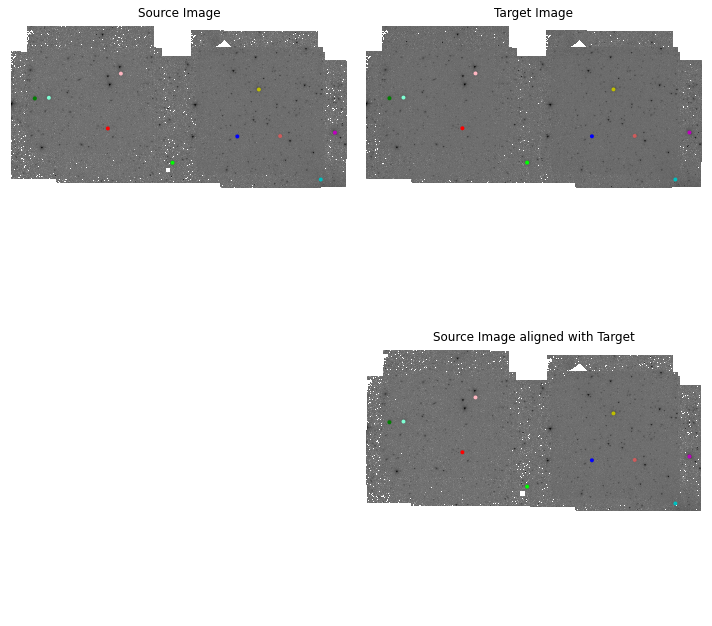

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'aquamarine', 'lime', 'indianred', 'lightpink']
#colors = make_random_cmap(ncolors=50, seed=1612)

axes[0, 0].imshow(data2, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")
for (xp, yp), c in zip(pos_img[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 4, fill=False, edgecolor=c, linewidth=2)
    axes[0, 0].add_patch(circ)

axes[0, 1].imshow(data1, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[0, 1].add_patch(circ)

axes[1, 1].imshow(img_aligned, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[1, 1].axis('off')
axes[1, 1].set_title("Source Image aligned with Target")
for (xp, yp), c in zip(pos_img_rot[:len(colors)], colors):
    circ = plt.Circle((xp, yp), 4 * p.scale, fill=False, edgecolor=c, linewidth=2)
    axes[1, 1].add_patch(circ)

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()

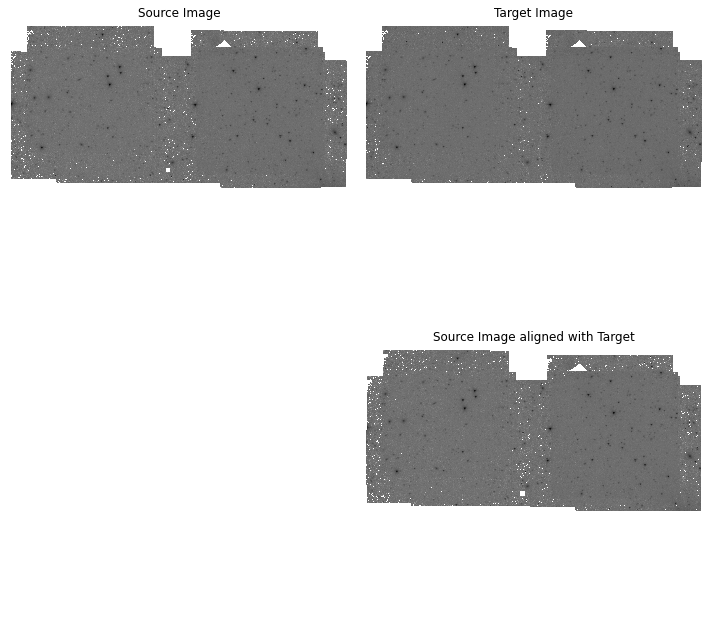

In [55]:
img_aligned2, footprint2 = aa.apply_transform(p, df2.to_numpy(), df1.to_numpy())

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(data2, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[0, 0].axis('off')
axes[0, 0].set_title("Source Image")

axes[0, 1].imshow(data1, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[0, 1].axis('off')
axes[0, 1].set_title("Target Image")

axes[1, 1].imshow(img_aligned2, cmap='Greys', origin='lower', norm=norm, interpolation='nearest')
axes[1, 1].axis('off')
axes[1, 1].set_title("Source Image aligned with Target")

axes[1, 0].axis('off')

plt.tight_layout()
plt.show()